In [1]:
#Single-Layer Perceptron Attempting XOR (with Decision Boundary)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Sigmoid activation function
def sigmoid(x):
    """Sigmoid squashes input to (0, 1)"""
    return 1 / (1 + np.exp(-x))

In [3]:
# Derivative of sigmoid
def sigmoid_derivative(x):
    """Used in gradient descent"""
    sx = sigmoid(x)
    return sx * (1 - sx)

In [4]:
# XOR input and output
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

In [5]:
# XOR labels
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [6]:
# Initialize weights and bias
np.random.seed(42)  # for reproducibility
weights = np.random.randn(2, 1)  # one weight for each input
bias = np.random.randn()

In [7]:
# Learning rate
lr = 0.1
losses = []

In [8]:
# Train using gradient descent
for epoch in range(10000):
    # Forward pass
    z = np.dot(X, weights) + bias
    pred = sigmoid(z)
    
    # Calculate error and loss
    error = y - pred
    loss = np.mean(error ** 2)
    losses.append(loss)
    
    # Backpropagation
    d_pred = error * sigmoid_derivative(z)
    weights += lr * np.dot(X.T, d_pred)
    bias += lr * np.sum(d_pred)

In [9]:
# Print final weights and bias
print("Weights:", weights.ravel())
print("Bias:", bias)

Weights: [-2.46653028e-16 -2.45866528e-16]
Bias: 1.642516958664655e-16


In [10]:
# Testing perceptron on XOR
print("\nTesting Perceptron on XOR data:")
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    output = sigmoid(z)
    print(f"Input: {X[i]} -> Output: {np.round(output[0])}")


Testing Perceptron on XOR data:
Input: [0 0] -> Output: 0.0
Input: [0 1] -> Output: 0.0
Input: [1 0] -> Output: 0.0
Input: [1 1] -> Output: 0.0


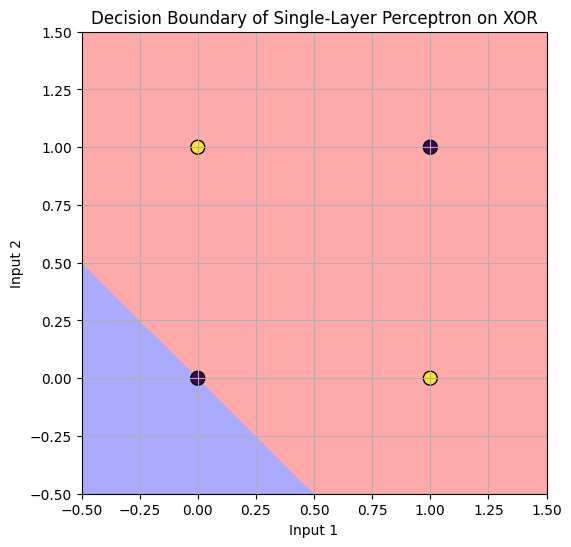

In [11]:
# Visualize decision boundary
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
z = sigmoid(np.dot(grid, weights) + bias)
z = z.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, z, levels=[0, 0.5, 1], colors=['#FFAAAA', '#AAAAFF'])
plt.scatter(X[:,0], X[:,1], c=y.flatten(), edgecolors='k', s=100)
plt.title("Decision Boundary of Single-Layer Perceptron on XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()

In [ ]:
#The decision boundary is a straight line.
#XOR data cannot be separated by a straight line i.e., not linear seperable

In [12]:
#Mullti-Layer Perceptron Attempting XOR (with Decision Boundary)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Sigmoid activation function
def sigmoid(x):
    """Sigmoid squashes input to (0, 1)"""
    return 1 / (1 + np.exp(-x))

In [14]:
# Derivative of sigmoid
def sigmoid_derivative(x):
    """Used in gradient descent"""
    sx = sigmoid(x)
    return sx * (1 - sx)

In [15]:
# XOR input and output
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

In [16]:
# XOR labels
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [24]:
# Set seed for reproducibility
np.random.seed(42)

# Initialize weights and biases
# Hidden layer: 2 neurons, so weights shape = (2 inputs, 2 neurons)
hidden_weights = np.random.randn(2, 2)
hidden_bias = np.random.randn(1, 2)

In [25]:
# Output layer: 1 neuron, taking input from 2 hidden neurons
output_weights = np.random.randn(2, 1)
output_bias = np.random.randn(1)

# Learning rate
lr = 0.1

# For plotting loss
losses = []

In [26]:
# Training loop
for epoch in range(10000):
    # --- FORWARD PASS ---
    # Hidden layer
    z1 = np.dot(X, hidden_weights) + hidden_bias   # shape: (4,2)
    a1 = sigmoid(z1)                               # activation of hidden layer

    # Output layer
    z2 = np.dot(a1, output_weights) + output_bias  # shape: (4,1)
    a2 = sigmoid(z2)                               # final prediction

    # --- BACKWARD PASS ---
    error = y - a2
    loss = np.mean(error ** 2)
    losses.append(loss)

    # Derivative at output
    d_a2 = error * sigmoid_derivative(z2)

    # Gradient for output weights and bias
    d_output_weights = np.dot(a1.T, d_a2)
    d_output_bias = np.sum(d_a2, axis=0)

    # Backpropagate to hidden layer
    d_a1 = np.dot(d_a2, output_weights.T) * sigmoid_derivative(z1)

    # Gradient for hidden weights and bias
    d_hidden_weights = np.dot(X.T, d_a1)
    d_hidden_bias = np.sum(d_a1, axis=0)

    # --- UPDATE WEIGHTS ---
    output_weights += lr * d_output_weights
    output_bias += lr * d_output_bias

    hidden_weights += lr * d_hidden_weights
    hidden_bias += lr * d_hidden_bias

In [30]:
# Final testing
print("Testing XOR after training:\n")
for i in range(len(X)):
    # Forward pass
    z1 = np.dot(X[i], hidden_weights) + hidden_bias
    a1 = sigmoid(z1)
    z2 = np.dot(a1, output_weights) + output_bias
    a2 = sigmoid(z2)

    # Convert outputs to scalar using .item()
    raw_output = a2.item()
    rounded_output = round(raw_output)

    # Print both values
    print(f"Input: {X[i]} => Raw Output: {raw_output:.4f}, Rounded: {rounded_output}")

Testing XOR after training:

Input: [0 0] => Raw Output: 0.0540, Rounded: 0
Input: [0 1] => Raw Output: 0.9505, Rounded: 1
Input: [1 0] => Raw Output: 0.9501, Rounded: 1
Input: [1 1] => Raw Output: 0.0536, Rounded: 0


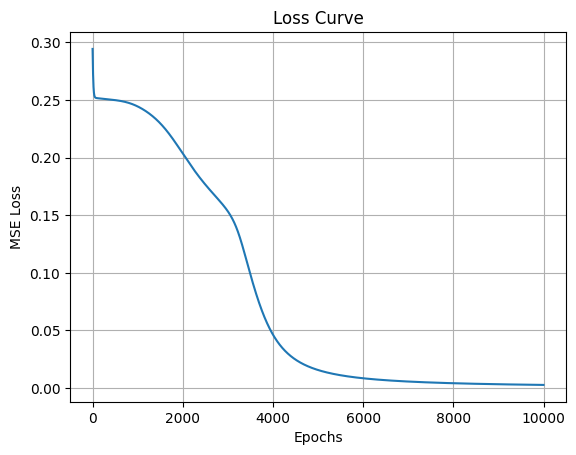

In [31]:
# Plot loss curve
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

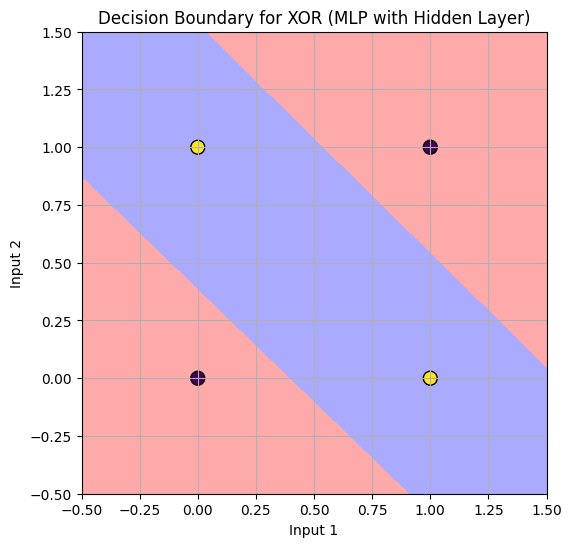

In [32]:
# Visualizing decision boundary
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict over the grid
z1 = np.dot(grid, hidden_weights) + hidden_bias
a1 = sigmoid(z1)
z2 = np.dot(a1, output_weights) + output_bias
a2 = sigmoid(z2)
a2 = a2.reshape(xx.shape)

# Plot
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, a2, levels=[0, 0.5, 1], colors=['#FFAAAA', '#AAAAFF'])
plt.scatter(X[:,0], X[:,1], c=y.flatten(), edgecolors='k', s=100)
plt.title("Decision Boundary for XOR (MLP with Hidden Layer)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()

In [ ]:
#this model successfully mapped non-linear patterns using the hidden layer.